<a href="https://colab.research.google.com/github/screuuu/data_sc/blob/alpha_b1/happy_sad_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and loading dependencies

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

# Setting gpu limit

In [ ]:
# To prevent Out-Of-Memory (OOM) errors, we are setting GPU memory growth during training.


gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

# Deleting dodgy images

In [ ]:
''' structure:
              data
              ├── happy
              └── sad
'''
data_dir = ['sad', 'happy']
img_ext = ['jpeg','png','jpg','bmp']
for dir in data_dir:
  for image in os.listdir(os.path.join("data",dir)):
    img_path = os.path.join("data",dir,image)
    try:
      tip = imghdr.what(img_path)
      if tip not in img_ext or os.path.getsize(img_path) < 10000:
        os.remove(img_path)
    except Exception as e:
      print(e)


# Load data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data/')

Found 186 files belonging to 2 classes.


In [ ]:
# Creating a numpy iterator
data_itereator = data.as_numpy_iterator()

In [ ]:
# batching data default batch size from keras is 32
batch = data_itereator.next()

In [ ]:
# batch consists images and labels
# Class 1 represents Sad and 0 represents Happy
batch[1]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int32)

# Printing the images



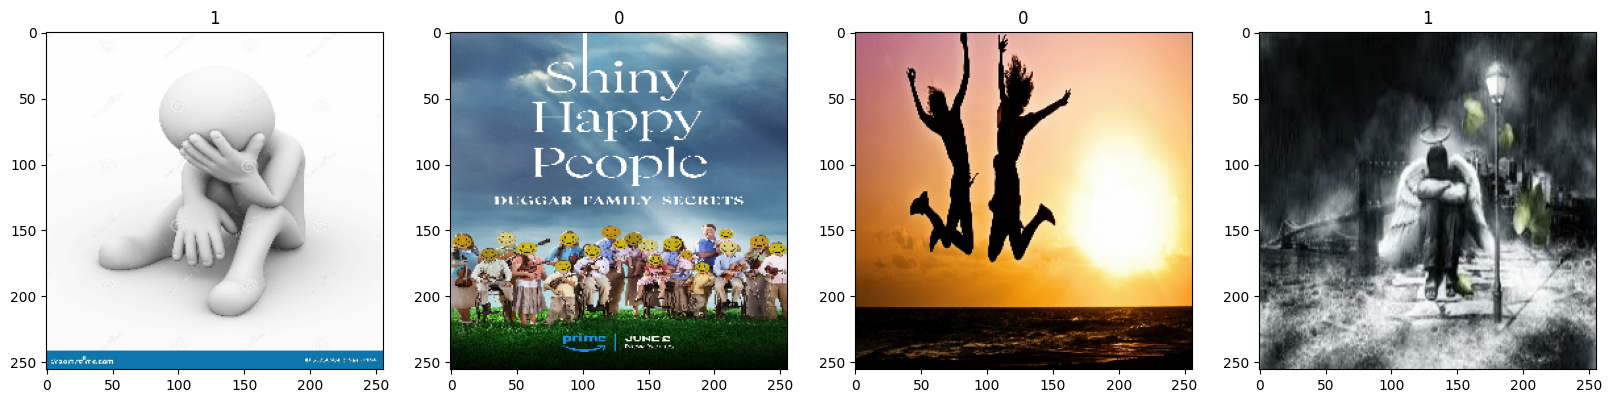

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 4 columns and set the figsize
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])

plt.show()


In [ ]:
batch[0].max()

255.0

# Scalling the data

In [ ]:
# Scalling of data should be 0 to 1 for better efficiency
data1 = data.map(lambda x,y: (x/255,y)) # 255 is the max value of our data set

In [ ]:
batch1 = data1.as_numpy_iterator().next()

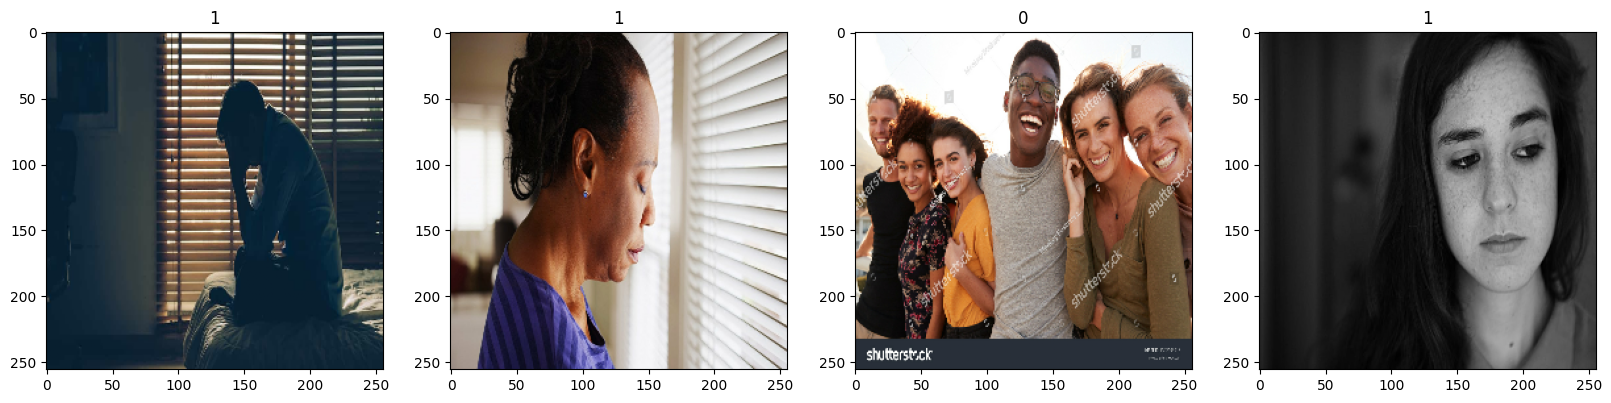

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 4 columns and set the figsize
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, img in enumerate(batch1[0][:4]):
    ax[idx].imshow(img)
    ax[idx].set_title(batch1[1][idx])

plt.show()

# Splitting data

[Tf dataset documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

In [ ]:
# Check the batch sizes before training

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*0.1)+1

print(train_size,val_size,test_size)

4 1 1


In [ ]:
train = data1.take(train_size)
val = data1.skip(train_size).take(val_size)
test = data1.skip(train_size+val_size).take(test_size)

# Building Deep Learning model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
batch1[0][0].shape

(256, 256, 3)

In [ ]:
# Adding a convulutional layer to detect features from images and using relu acitvation for adding non-linearity to our model
model.add(Conv2D(16, (3,3), 1 ,activation='relu',input_shape=(256, 256, 3)))

# By using Maxpooling we minimizing the max length by half
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1 ,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1 ,activation='relu'))
model.add(MaxPooling2D())

# Now flattening the 2d features
model.add(Flatten())

# We are using fully connected layers
model.add(Dense(256,activation='relu'))

# sigmoid activation is used for binary type classifications [0,1]
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# we are using adam optimizer
model.compile('adam', loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
# To check the construction of the model
model.summary()

# Training the model

In [ ]:
logDir = 'logs'
tesnsorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logDir)

In [ ]:
hist = model.fit(train, epochs=20,validation_data = val,callbacks=[tesnsorboard_callback])

Epoch 1/20
4/4 [==============================] - 20s 1s/step - loss: 1.5781 - accuracy: 0.5547 - val_loss: 0.9432 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 8s 1s/step - loss: 0.7167 - accuracy: 0.5781 - val_loss: 0.5618 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 9s 2s/step - loss: 0.5764 - accuracy: 0.6484 - val_loss: 0.4704 - val_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 7s 1s/step - loss: 0.5644 - accuracy: 0.6484 - val_loss: 0.5104 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 7s 1s/step - loss: 0.5028 - accuracy: 0.7578 - val_loss: 0.5725 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 7s 1s/step - loss: 0.4827 - accuracy: 0.8516 - val_loss: 0.3690 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 8s 1s/step - loss: 0.4498 - accuracy: 0.7734 - val_loss: 0.4644 - val_accuracy: 0.8125
Epoch 8/20
4/4 [========================

# Plot Performance

In [ ]:
hist.history

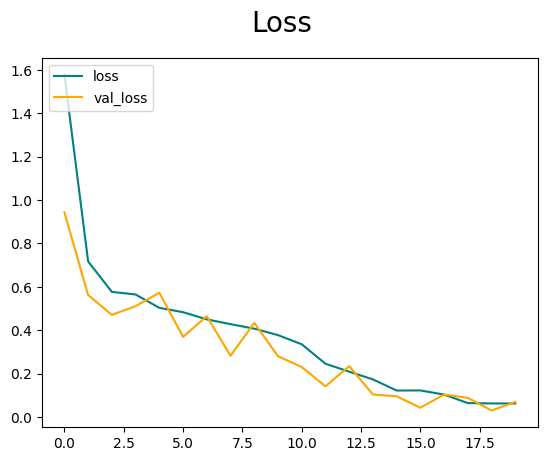

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

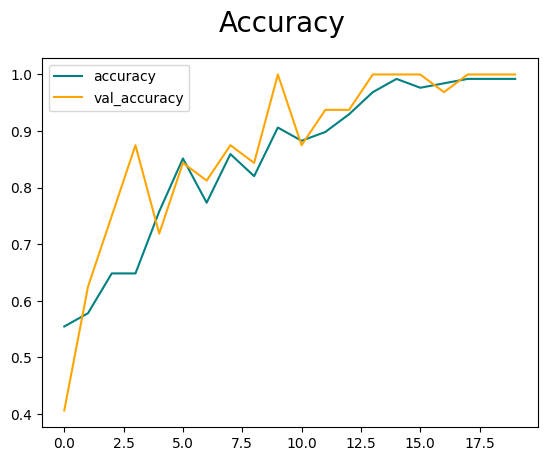

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate performacne

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

pre = Precision()
rec = Recall()
bina = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x,y = batch
  y_prd = model.predict(x)
  pre.update_state(y,y_prd)
  rec.update_state(y,y_prd)
  bina.update_state(y,y_prd)


1/1 [==============================] - 0s 420ms/step


In [ ]:
print(f"Precision: {pre.result().numpy()}\nRecall: {rec.result().numpy()}\nBinary Accuracy: {bina.result().numpy()}")

Precision: 1.0
Recall: 1.0
Binary Accuracy: 1.0


# Test

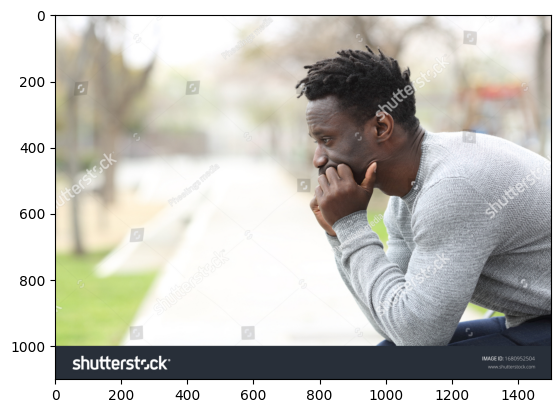

In [ ]:
img = cv2.imread('sad2.jpg')

# Generally open cv uses BGR standard as default
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

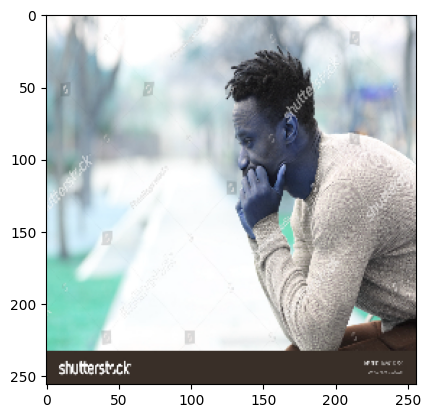

In [ ]:
re_img = tf.image.resize(img, (256,256))
plt.imshow(re_img.numpy().astype(int))

In [ ]:
# Model expects the data to be a batch
y_prd = model.predict(np.expand_dims(re_img/255,0))

1/1 [==============================] - 0s 36ms/step


In [ ]:
if y_prd >= 0.5:
  print("Predicted class is sad",y_prd)
else:
  print("Predicted class is happy",y_prd)

Predicted class is sad [[0.9370349]]


# Load Model

In [ ]:
model.save(os.path.join('models','happy_or_sad_model.h5'))

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
new_model = load_model(os.path.join('models','happy_or_sad_model.h5'))

In [ ]:
y_prd = new_model.predict(np.expand_dims(re_img/255,0))
if y_prd >= 0.5:
  print("Predicted class is sad",y_prd)
else:
  print("Predicted class is happy",y_prd)

1/1 [==============================] - 0s 119ms/step
Predicted class is sad [[0.9370349]]
